## Lesson 1: Downloading Stock Data  
## Хичээл 1: Хувьцааны өгөгдөл татаж авах

Энэ хичээлд бид Python-ийн `yfinance` санг ашиглан хувьцааны үнийн мэдээллийг татаж авч, pandas dataframe-д хэрхэн оруулахыг сурах болно.  
In this lesson, we learn how to download stock price data using Python’s `yfinance` library and load it into a pandas dataframe.

In [5]:
import yfinance as yf      # Import the yfinance library – хувьцааны мэдээлэл татах сан
# Import pandas for data processing – өгөгдөл боловсруулах pandas сан
import pandas as pd

# Download historical stock data for Apple – Apple компанийн түүхэн үнэ татах
data = yf.download("AAPL", start="2024-01-01", end="2024-12-31")

# Display the first few rows – Эхний хэдэн мөрийг хэвлэх, сүүлийн 5 мөрийг харуулах print(data.tail(5))
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  184.290436  187.070083  182.553158  185.789453  82488700
2024-01-03  182.910507  184.528662  182.096461  182.880727  58414500
2024-01-04  180.587540  181.758954  179.565029  180.825785  71983600
2024-01-05  179.862823  181.431339  178.860172  180.666948  62303300
2024-01-08  184.210999  184.250716  180.180517  180.766224  59144500


## Lesson 2: Calculating Daily Returns  
## Хичээл 2: Өдөр тутмын өгөөжийг тооцоолох

Энэ хичээлээр хувьцааны хаалтын үнийн өөрчлөлт буюу өдөр тутмын өгөөжийг тооцоолох аргыг үзнэ. Өгөгдлийг боловсруулах үндсэн ойлголтуудыг авч үзнэ.  
In this lesson, we calculate daily returns based on closing prices and understand basic data processing concepts.

In [4]:
import yfinance as yf      # yfinance санг дуудаж байна
import pandas as pd        # pandas санг дуудаж өгөгдөл боловсруулахад ашиглана

# Download stock data – Хувьцааны өгөгдөл татаж авна
data = yf.download("AAPL", start="2024-01-01", end="2024-12-31")

# Calculate daily return – Өдөр тутмын өгөөжийг тооцоолно
data['Daily Return'] = data['Close'].pct_change()

# Show Close price and Daily Return – Хаалтын үнэ ба өгөөжийг харуулна
print(data[['Close', 'Daily Return']].head())

[*********************100%***********************]  1 of 1 completed

Price            Close Daily Return
Ticker            AAPL             
Date                               
2024-01-02  184.290436          NaN
2024-01-03  182.910507    -0.007488
2024-01-04  180.587540    -0.012700
2024-01-05  179.862823    -0.004013
2024-01-08  184.210999     0.024175


## Lesson 3: Plotting Closing Prices with Moving Averages  
## Хичээл 3: Хаалтын үнийн график болон шилжих дундаж зурж үзэх

Энэ хичээлд хувьцааны хаалтын үнийн график болон 5 болон 20 хоногийн шилжих дундажийг хэрхэн үүсгэж, matplotlib ашиглан дүрслэхийг судлах болно.  
In this lesson, we plot closing prices along with 5-day and 20-day moving averages using matplotlib for data visualization.

[*********************100%***********************]  1 of 1 completed


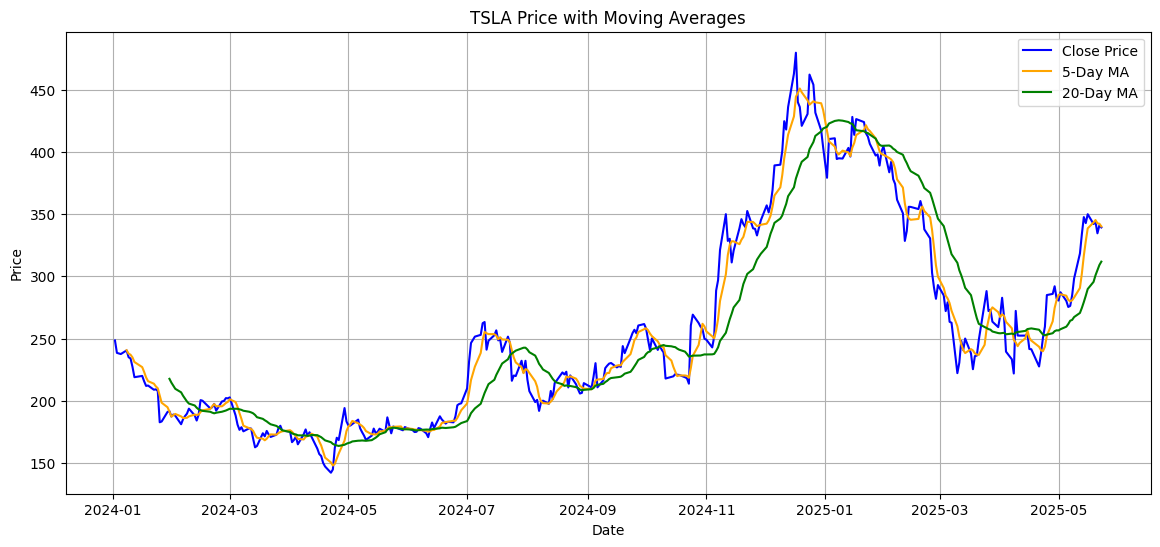

In [3]:
import yfinance as yf                  # yfinance ашиглан хувьцааны мэдээлэл татах
import pandas as pd                    # pandas ашиглан өгөгдөл боловсруулах
import matplotlib.pyplot as plt        # matplotlib ашиглан график зурах

# Download TSLA (Tesla) stock data – Tesla компанийн хувьцааны үнэ татах
data = yf.download("TSLA", start="2024-01-01", end="2025-05-24")

# 5-day moving average – 5 хоногийн дундаж үнэ тооцоолох
data['MA5'] = data['Close'].rolling(window=5).mean()

# 20-day moving average – 20 хоногийн дундаж үнэ тооцоолох
data['MA20'] = data['Close'].rolling(window=20).mean()

# Plotting the data – График зурах хэсэг
# Зургийн хэмжээ тохируулах
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Price',
         color='blue')    # Хаалтын үнэ зурах
plt.plot(data['MA5'], label='5-Day MA',
         color='orange')       # 5 хоногийн дундаж
plt.plot(data['MA20'], label='20-Day MA',
         color='green')      # 20 хоногийн дундаж

plt.title('TSLA Price with Moving Averages')             # Графикийн гарчиг
plt.xlabel('Date')                                       # Х-тийн гарчиг
plt.ylabel('Price')                                      # Y-гийн гарчиг
plt.legend()                                             # Тэмдэглэгээ нэмэх
plt.grid(True)                                           # Сүлжээ нэмэх
plt.show()                                               # График гаргах

## Lesson 4: Volatility Analysis using Standard Deviation  
 		Learn how to calculate and visualize stock volatility using 20-day rolling standard deviation in Python.  
 		Python ашиглан хувьцааны үнийн 20 хоногийн хэлбэлзлийг (стандарт хазайлт) тооцож, график дээр үзүүлж сурна.

  		Тайлбар: 
		 Энэхүү хичээлээр хувьцааны үнийн хэлбэлзлийг (volatility) стандарт хазайлт (standard deviation) ашиглан тооцож, график зурна.
          Зорилго / Purpose of This Lesson
		  		•	A high SD means the stock price is very volatile (moves up and down a lot).
	        	•	Их стандарт хазайлт = хувьцааны үнэ маш их хэлбэлзэлтэй байна (эрсдэл өндөр).
				•	A high SD means the stock price is very volatile (moves up and down a lot).
				•	Бага стандарт хазайлт = хувьцааны үнэ тогтвортой, бага хэлбэлзэлтэй байна (эрсдэл багатай).

		# Daily return (өдрийн өгөөж) үндсэн дээр.  
					•	rolling(window=20) → Сүүлийн 20 өдрийн дундаж
					•	.std() → Тэр дундажийн стандарт хазайлтыг тооцно
					data['Volatility'] = data['Daily Return'].rolling(window=20).std()  

[*********************100%***********************]  1 of 1 completed


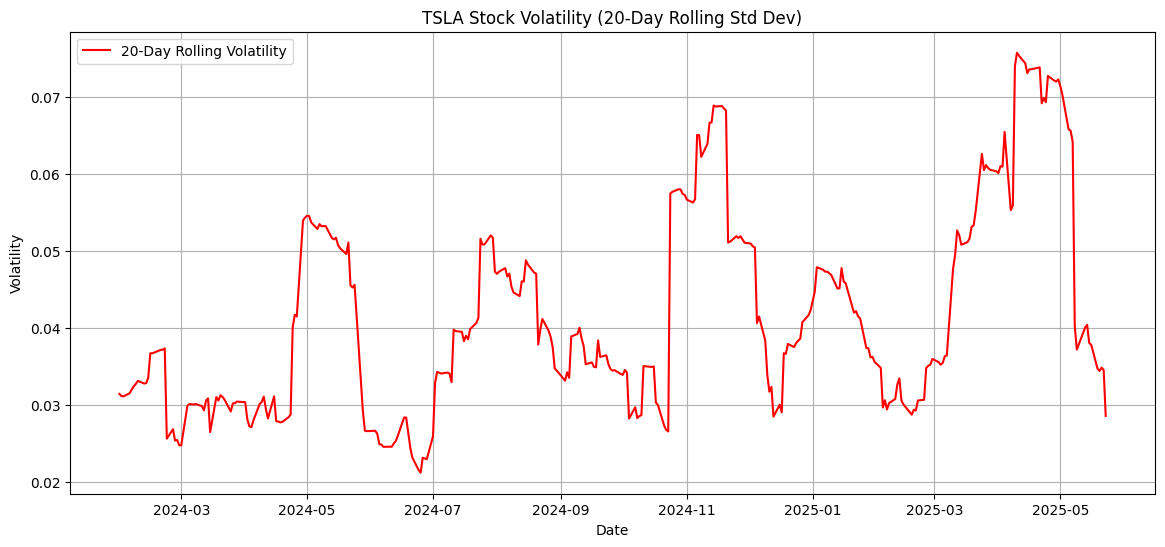

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download Tesla stock data (TSLA)
data = yf.download("TSLA", start="2024-01-01", end="2025-05-24")

# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()

# Calculate rolling standard deviation (volatility)
# This is the 20-day rolling standard deviation of daily returns
data['Volatility'] = data['Daily Return'].rolling(window=20).std()

# Plot the volatility
plt.figure(figsize=(14, 6))
plt.plot(data['Volatility'], label='20-Day Rolling Volatility', color='red')
plt.title('TSLA Stock Volatility (20-Day Rolling Std Dev)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

## Lesson 5: Stock Correlation Analysis /Олон хувьцааны уялдааг харах үед ашиглана./
        Goal: Learn how to analyze the relationship between two stocks using correlation.
        Зорилго: Хоёр хувьцааны хоорондын хамаарлыг (correlation) хэрхэн тооцоолох, тайлбарлахыг сурна.

        Correlation measures the relationship between two stock price movements:
        Корреляци гэдэг нь хоёр хувьцааны үнэ хэр зэрэг хоорондоо хамааралтай хөдөлж байгааг хэмждэг үзүүлэлт юм:
	•	+1 → Хоёр хувьцаа адилхан чиглэлд хөдөлнө, Prices move in the same direction
	•	0 → Хамааралгүй, No relation
	•	–1 → Эсрэг чиглэлд хөдөлнө, Prices move in opposite directions

[**********************67%*******                ]  2 of 3 completed

[*********************100%***********************]  3 of 3 completed


Stock return correlation:
Ticker      AAPL      MSFT      TSLA
Ticker                              
AAPL    1.000000  0.555477  0.474957
MSFT    0.555477  1.000000  0.439817
TSLA    0.474957  0.439817  1.000000


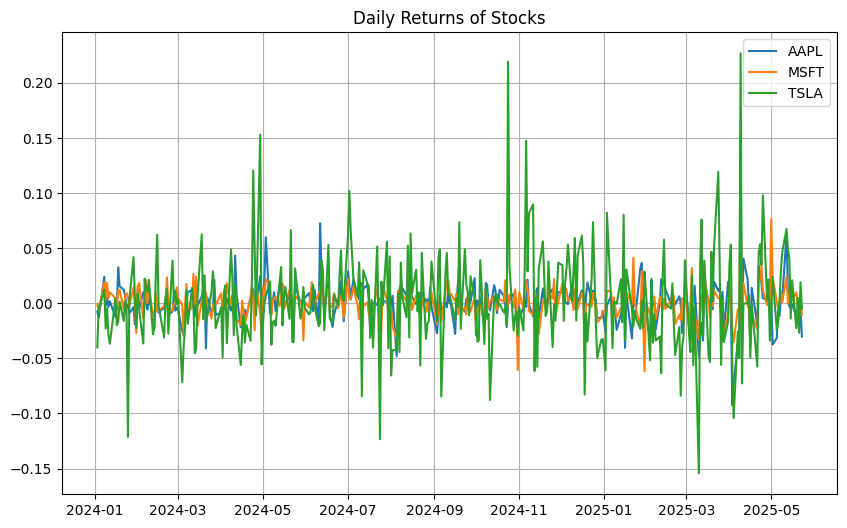

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 2. Татах хувьцааны нэрс (Apple, Microsoft, Tesla)
stocks = ['AAPL', 'MSFT', 'TSLA']

# 3. 2024 оноос хойших үнэ татах
data = yf.download(stocks, start="2024-01-01", end="2025-05-24")['Close']

# 4. Өдөр тутмын өгөөжийг тооцоолох
returns = data.pct_change()

# 5. Өгөөжийн correlation тооцоолох
correlation = returns.corr()

# 6. Correlation matrix-г хэвлэх
print("Stock return correlation:")
print(correlation)

# 7. Графикаар үзүүлэх
plt.figure(figsize=(10, 6))
plt.title("Daily Returns of Stocks")
for stock in stocks:
    plt.plot(returns[stock], label=stock)

plt.legend()
plt.grid(True)
plt.show()

## Lesson 5B
    Хоёр хувьцааны хоорондын уялдааг харах үед хэрэглэнэ.
    2x2 heatmap байна.


     Суралцах зүйлс / What you will learn
	1.	Correlation гэж юу вэ?
        – Хоёр хувьцааны өгөөж (returns) хэр зэрэг хоорондоо уялдаатай вэ гэдгийг хэмждэг.
        – +1: маш ижил чиглэлд хөдөлнө
        – -1: эсрэг чиглэлд хөдөлнө
        – 0: ямар ч хамааралгүй
	2.	Daily returns тооцоолох
        – pct_change() ашиглан өдөр бүрийн өгөөжийг гаргах.
	3.	Correlation matrix гаргах
        – pandas.DataFrame.corr() функцээр хоёр хувьцааны хоорондын хамаарлыг гаргана.
	4.	Heatmap зурах (Seaborn ашиглан)
        – sns.heatmap() ашиглан correlation matrix-ийг визуал хэлбэрээр харуулах.

    

[*********************100%***********************]  2 of 2 completed


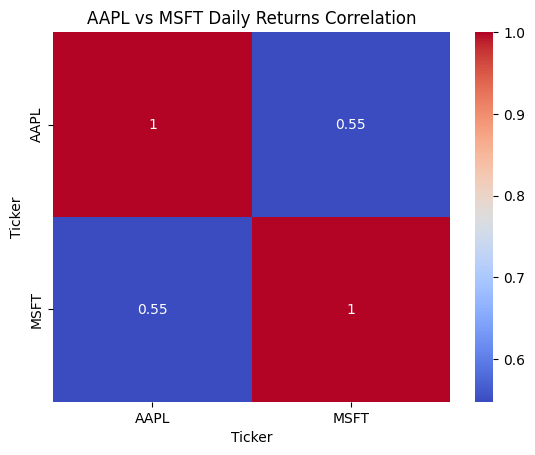

In [10]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Хувьцааны үнэ татах
stocks = ['AAPL', 'MSFT']
data = yf.download(stocks, start='2023-01-01', end='2023-12-31')['Close']

# 2. Өдөр тутмын өгөөж тооцоолох
returns = data.pct_change()

# 3. Correlation matrix гаргах
corr_matrix = returns.corr()

# 4. Heatmap зурж харуулах
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('AAPL vs MSFT Daily Returns Correlation')
plt.show()

[*********************100%***********************]  3 of 3 completed

Correlation Matrix:
Ticker      AAPL      MSFT      TSLA
Ticker                              
AAPL    1.000000  0.948934  0.827503
MSFT    0.948934  1.000000  0.750119
TSLA    0.827503  0.750119  1.000000


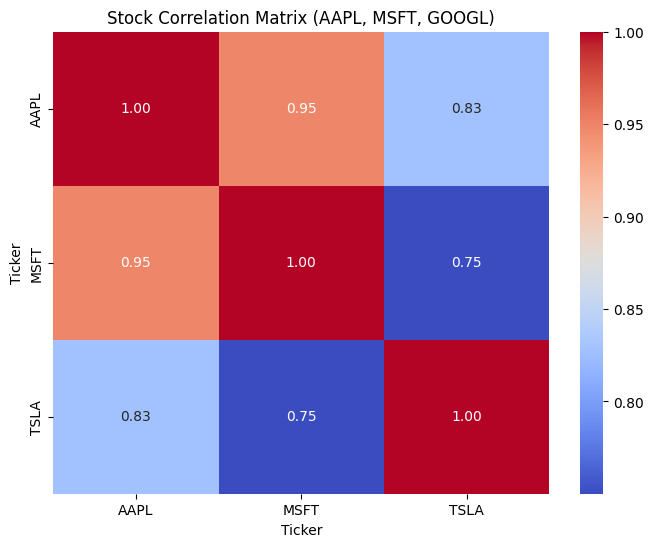

Ticker            AAPL        MSFT        TSLA
Date                                          
2023-01-03  123.470612  234.808929  108.099998
2023-01-04  124.744118  224.537643  113.639999
2023-01-05  123.421257  217.882843  110.339996
2023-01-06  127.962410  220.450699  113.059998
2023-01-09  128.485657  222.597076  119.769997
Index(['AAPL', 'MSFT', 'TSLA'], dtype='object', name='Ticker')


In [14]:
# Сангуудыг импортлох
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Хувьцааны тикерүүд
stocks = ['AAPL', 'MSFT', 'TSLA']

# Өгөгдөл татах (2023 онд)
data = yf.download(stocks, start="2023-01-01", end="2024-01-01")['Close']

# Correlation matrix тооцоолох
correlation_matrix = data.corr()

# Matrix хэвлэх
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap зурж харуулах
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Stock Correlation Matrix (AAPL, MSFT, GOOGL)")
plt.show()

# Debug: Show data structure
print(data.head())
print(data.columns)

## Lesson 6 
# Moving Averages – Хөдөлгөөнт дундаж

Зорилго:
	•	Хувьцааны үнийн дундаж чиг хандлагыг олох
	•	Богино ба урт хугацааны дундажийг харьцуулж, худалдах/худалдаж авах дохио (signal) үүсгэх


[*********************100%***********************]  1 of 1 completed

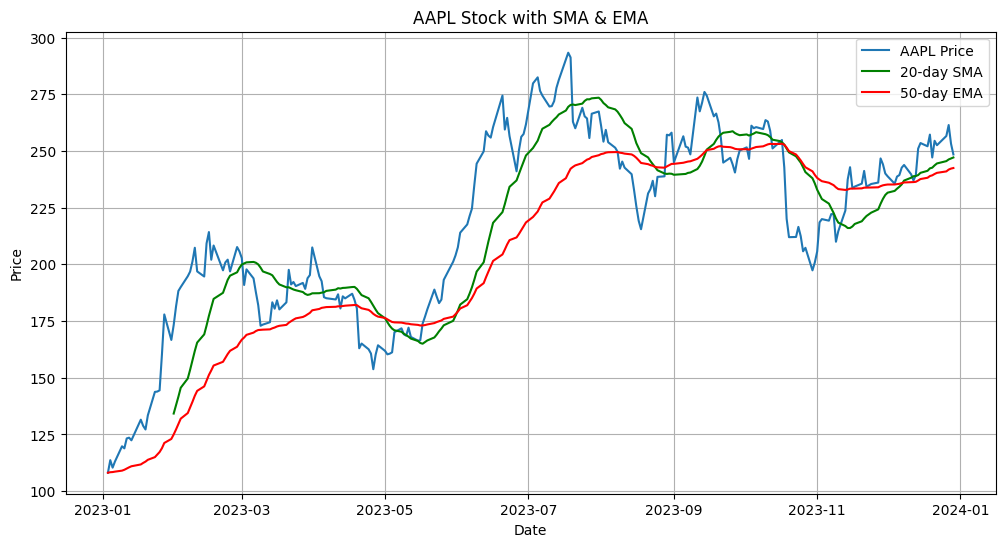

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download stock data
# Хувьцааны мэдээлэл татах
data = yf.download("TSLA", start="2023-01-01", end="2024-01-01")

# Calculate 20-day Simple Moving Average
# 20 хоногийн энгийн дундаж (SMA) тооцоолох
data['SMA_20'] = data['Close'].rolling(window=20).mean()

# Calculate 50-day Exponential Moving Average
# Дундаж 50 хоногийн EMA тооцоолох
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()

# Plot the results
# График зурах
#
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='AAPL Price')
plt.plot(data['SMA_20'], label='20-day SMA', color='green')
plt.plot(data['EMA_50'], label='50-day EMA', color='red')
plt.title("AAPL Stock with SMA & EMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

 ## Lesson 7: 
 # Trading Signals from Moving Averages  
 # Хөдөлгөөнт дундаж ашиглан худалдах/авах дохио олох
    График дээр дохиог хэрхэн харах вэ?
	•	Blue Arrow: Buy signal – Богино хугацааны дундаж уртаас дээш гарсан
	•	Black Arrow: Sell signal – Богино хугацааны дундаж уртаас доош гарсан


[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_7171/885950067.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][20:] = \


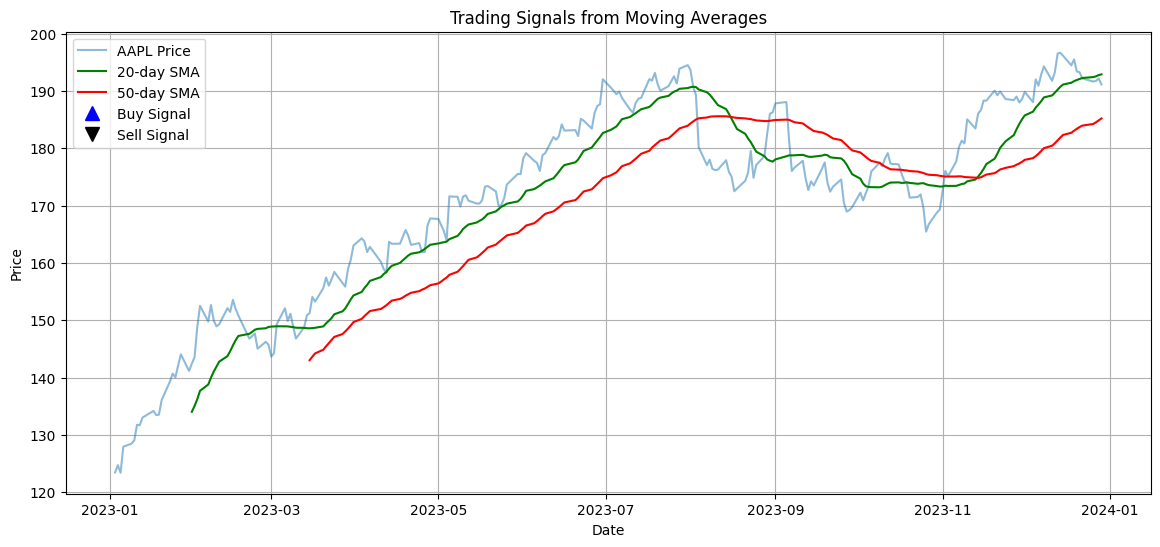

In [53]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Get data
data = yf.download('AAPL', start='2023-01-01', end='2024-01-01')

# Calculate moving averages
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Create buy/sell signals
data['Signal'] = 0
data['Signal'][20:] = \
    np.where(data['SMA_20'][20:] > data['SMA_50'][20:], 1, 0)

data['Position'] = data['Signal'].diff()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='AAPL Price', alpha=0.5)
plt.plot(data['SMA_20'], label='20-day SMA', color='green')
plt.plot(data['SMA_50'], label='50-day SMA', color='red')

# Plot buy signals
plt.plot(data[data['Position'] == 1].index,
         data['SMA_20'][data['Position'] == 1],
         '^', markersize=10, color='blue', label='Buy Signal')

# Plot sell signals
plt.plot(data[data['Position'] == -1].index,
         data['SMA_20'][data['Position'] == -1],
         'v', markersize=10, color='black', label='Sell Signal')

plt.title('Trading Signals from Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Алхам 1: Дата татах (Интернетээс жишээ дата)

# Жишээ: Yahoo Finance-с Apple (AAPL) хувьцааны өгөгдлийг татна

In [66]:
import yfinance as yf
import pandas as pd

# Apple (AAPL) хувьцааны өгөгдлийг татах, 1 жилийн хугацаагаар
ticker = "AAPL"
data = yf.download(ticker, start="2025-05-01", end="2025-05-30")

# Үндсэн дата эхлээд үзэх
print(data.head())

# Датагаа CSV файлд хадгалах
data.to_csv("AAPL_data.csv")
print("Дата 'AAPL_data.csv' файлд хадгалагдлаа.")

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2025-05-01  213.040634  214.279000  208.626409  208.806182   57365700
2025-05-02  205.081070  206.718922  201.895245  205.820091  101010600
2025-05-05  198.629532  203.832716  197.950430  202.834025   69018500
2025-05-06  198.250015  200.387212  196.761976  197.950420   51216500
2025-05-07  195.992981  199.178806  192.996910  198.909155   68536700
Дата 'AAPL_data.csv' файлд хадгалагдлаа.


## Алхам 2: Дата цэвэрлэх (хоосон, давхардал шалгах, устгах)

In [67]:
# Дата унших (дараагийн удаа хадгалсан файлаас)
df = pd.read_csv("AAPL_data.csv")

# Хоосон утгуудыг шалгах
print("Хоосон утгууд:")
print(df.isnull().sum())

# Давхардсан мөрүүдийг шалгах
print("Давхардсан мөрүүдийн тоо:", df.duplicated().sum())

# Хоосон мөрүүдийг устгах
df_clean = df.dropna()

# Давхардсан мөрүүдийг устгах
df_clean = df_clean.drop_duplicates()

# Цэвэр өгөгдлийг шалгах
print(df_clean.info())

# Цэвэр өгөгдлийг хадгалах
df_clean.to_csv("AAPL_data_clean.csv", index=False)
print("Цэвэр өгөгдлийг 'AAPL_data_clean.csv' файлд хадгаллаа.")

Хоосон утгууд:
Price     0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64
Давхардсан мөрүүдийн тоо: 0
<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 0 to 21
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   21 non-null     object
 1   Close   21 non-null     object
 2   High    21 non-null     object
 3   Low     21 non-null     object
 4   Open    21 non-null     object
 5   Volume  21 non-null     object
dtypes: object(6)
memory usage: 1.1+ KB
None
Цэвэр өгөгдлийг 'AAPL_data_clean.csv' файлд хадгаллаа.


## SMA 10 /10 өдрийн moving avarage/

    Apple-ийн хувьцааны хаалтын үнэ ба 10 өдрийн moving average (SMA_10)-г харьцуулсан график зурж байна. 
    Хоосон зай устгах, Close тоон хэлбэрт байгаа эсэхийг давхар шалгаж байна.

         Close      SMA_10
12  211.449997  204.095496
13  211.259995  204.713388
14  208.779999  205.728435
15  206.860001  206.589433
16  202.089996  207.199135
17  201.360001  207.611998
18  195.270004  207.311998
19  200.210007  206.253999
20  200.419998  205.003000
21  199.949997  203.764999


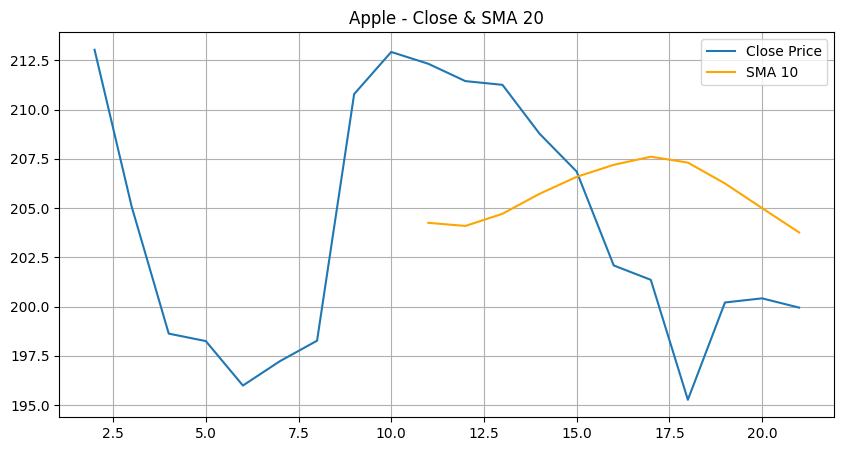

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Дата унших
df = pd.read_csv("AAPL_data.csv")

# CLOSE тоон хэлбэрт байгаа эсэхийг шалгах
df["Close"] = pd.to_numeric(df["Close"], errors='coerce')

# Хоосон зай устгах /Close багана доторх хоосон (NaN) мөрүүдийг устгаж байна./
df = df.dropna(subset=["Close"])

# SMA тооцоолох
df["SMA_10"] = df["Close"].rolling(window=10).mean()


# Харах
print(df[["Close", "SMA_10"]].tail(10))

# Зураг зурах
plt.figure(figsize=(10, 5))
plt.plot(df["Close"], label="Close Price")
plt.plot(df["SMA_10"], label="SMA 10", color='orange')
plt.legend()
plt.title("Apple - Close & SMA 10")
plt.grid()
plt.show()

 ## Simple Buy, Sell signal 
 
    Apple-ийн хувьцааны (AAPL) хаалтын үнийг ашиглан SMA (Simple Moving Average) 10-г тооцоолж, авъя / заръя гэсэн энгийн сигнал гаргаж, үр дүнг AAPL_signal_data.csv файлд хадгалдаг

In [ ]:
import pandas as pd

# CSV унших
df = pd.read_csv("AAPL_data.csv")

# Хоосон утгууд устгах
df.dropna(inplace=True)

# Close баганыг float төрөлд хөрвүүлэх
df["Close"] = pd.to_numeric(df["Close"], errors='coerce')

# SMA_10 тооцоолох
df["SMA_10"] = df["Close"].rolling(window=10).mean()

# Signal багана үүсгэх
# Close үнэ SMA_10-оос дээш бол 1, доош бол -1
df["Signal"] = 0
df.loc[df["Close"] > df["SMA_10"], "Signal"] = 1
df.loc[df["Close"] < df["SMA_10"], "Signal"] = -1

# Buy/Sell багана үүсгэх /Зөвхөн сигналыг харуулах/
df["Buy"] = df.apply(lambda x: x["Close"] if x["Signal"]
                     == 1 else None, axis=1)
df["Sell"] = df.apply(lambda x: x["Close"] if x["Signal"]
                      == -1 else None, axis=1)

# Шинэ файлд датаг хадгалах
df.to_csv("AAPL_signal_data.csv", index=False)

## (SMA 10 + Buy/Sell Signals) SMA зөрүүг тооцсон.

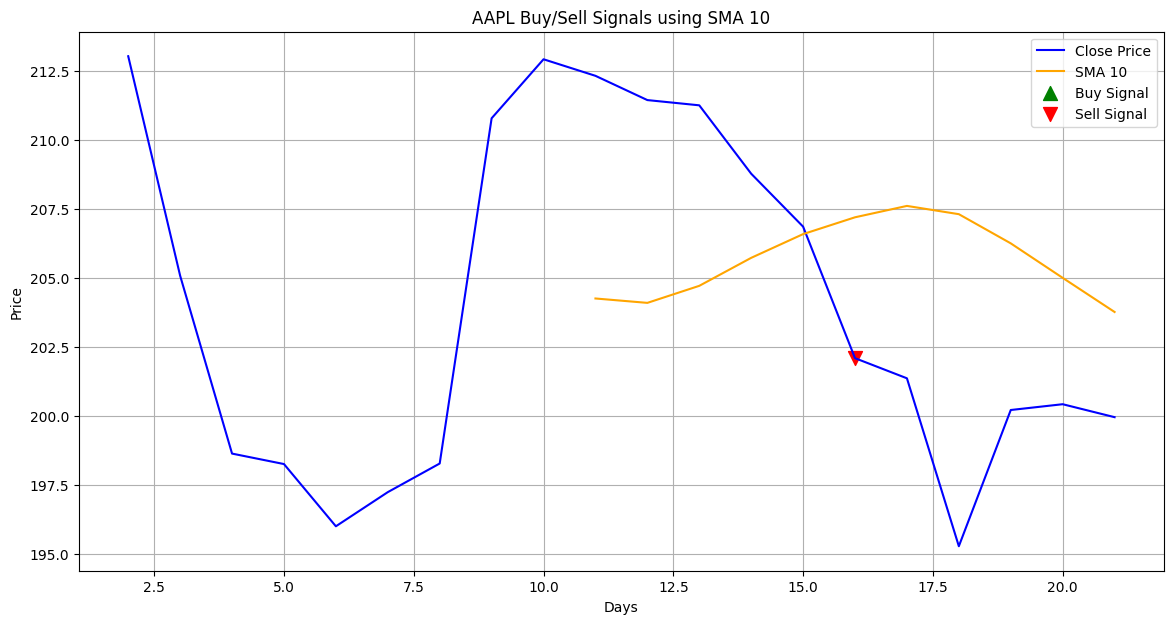

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. CSV файл унших
df = pd.read_csv("AAPL_data.csv")

# 2. Close баганыг float болгох
df["Close"] = pd.to_numeric(df["Close"], errors='coerce')

# 3. NaN утгууд устгах
df.dropna(inplace=True)

# 4. SMA_10 багана үүсгэх
df["SMA_10"] = df["Close"].rolling(window=10).mean()

# 5. Close ба SMA зөрүү тооцох
df["Diff"] = df["Close"] - df["SMA_10"]

# 6. Signal багана (1: Buy, -1: Sell, 0: No signal)
df["Signal"] = 0
df.loc[(df["Diff"] > 0) & (df["Diff"].shift(1) <= 0),
       "Signal"] = 1  # Buy сигнал
df.loc[(df["Diff"] < 0) & (df["Diff"].shift(1) >= 0),
       "Signal"] = -1  # Sell сигнал

# 7. Buy/Sell баганууд
df["Buy"] = df[df["Signal"] == 1]["Close"]
df["Sell"] = df[df["Signal"] == -1]["Close"]

# 8. График зурж Buy/Sell тэмдэглэх
plt.figure(figsize=(14, 7))
plt.plot(df["Close"], label="Close Price", color='blue')
plt.plot(df["SMA_10"], label="SMA 10", color='orange')
plt.scatter(df.index, df["Buy"], label="Buy Signal",
            marker="^", color="green", s=100)
plt.scatter(df.index, df["Sell"], label="Sell Signal",
            marker="v", color="red", s=100)
plt.title("AAPL Buy/Sell Signals using SMA 10")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# 9. CSV файлд хадгалах (шаардлагатай бол)
df.to_csv("AAPL_SMA10_signals.csv", index=False)